<a href="https://colab.research.google.com/github/CarolinaOliveira001/Complex_Network/blob/main/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
filenameTwitter = "/content/twitter/1046661.edges"

In [ ]:
graphTwitter = nx.DiGraph()

with open(filenameTwitter) as f:
    for line in f:
        x = line.split()
        a = int(x[0])
        b = int(x[1])
        
        if a not in list(graphTwitter.nodes):
            graphTwitter.add_node(a)
        if b not in list(graphTwitter.nodes):
            graphTwitter.add_node(b)

        graphTwitter.add_edge(a, b)

#Question (a)

Here we calculate the betweenness closeness and the page rank for the Twitter ego.

In [ ]:
print(nx.betweenness_centrality(graphTwitter, normalized = True))

{1044771: 0.01478589078506442, 7423322: 0.0, 9921142: 0.014358497619030176, 4556941: 0.0, 2916671: 0.0007795646125984265, 1049111: 0.009752992005778581, 17743: 0.00021894900540528396, 1452261: 0.02413210286645817, 1403031: 0.003875992268832457, 1049981: 0.013188477559673985, 1118161: 0.007233423150414847, 1117341: 0.060812726425906426, 6100262: 0.0018065798757766485, 51421542: 0.0037443043483471865, 991221: 0.1324727616020164, 814153: 0.0002851278827851622, 1116721: 0.06607315968588229, 795536: 0.0008520936922753694, 1269251: 0.021955545333611954, 1468951: 0.0013131840869752705, 2217251: 0.0019040271792412724, 5516192: 0.0033329039601909857, 1044591: 0.061391640547474174, 1118781: 0.021023810182825252, 1975721: 0.0008288862584441464, 678953: 0.07388116543958327, 8956052: 0.005088324645088782, 5515802: 0.030160827460411932, 6277512: 0.00041619504161526056, 1045141: 0.03234672918105402, 6550132: 0.025405464505528573, 1047451: 0.02581808315231258, 5920812: 8.93172700644135e-05, 14106930: 

In [ ]:
print(nx.pagerank(graphTwitter))

{1044771: 0.015008804010161067, 7423322: 0.004884068671590706, 9921142: 0.019368051193900417, 4556941: 0.00328475980967503, 2916671: 0.005565300126860315, 1049111: 0.010260943496847731, 17743: 0.00569500568967493, 1452261: 0.01576123472758411, 1403031: 0.0072688080503469435, 1049981: 0.010234685499893172, 1118161: 0.007851551190009264, 1117341: 0.019793179324550658, 6100262: 0.006630903943222263, 51421542: 0.016619852542099387, 991221: 0.03683129178462545, 814153: 0.0033935091498222525, 1116721: 0.028082484932996452, 795536: 0.004729757571272397, 1269251: 0.021352701276639602, 1468951: 0.016946810245179238, 2217251: 0.008663560258635756, 5516192: 0.006861433049581603, 1044591: 0.02542288926288988, 1118781: 0.02144818846941871, 1975721: 0.009258723911533723, 678953: 0.02151440668477972, 8956052: 0.00878388264931003, 5515802: 0.015325376058801504, 6277512: 0.005550131443666097, 1045141: 0.022592285811291222, 6550132: 0.01921358964931144, 1047451: 0.021400844269627142, 5920812: 0.00336331

#Question (b)

We can see that the page rank values are much larger than the values for the betweenness closeness. This difference could have been lead by the coefficients $\alpha$ and $\beta$ in the pagerank formula. 

In general, the betweenness closeness helps us to find which node act more like a bridge in the network. On the other hand, the pagerank takes more into account like how many connections to a node and how many connections to the nodes which are connected to the node and so on..

#Question (c)

Using a function from the library networkx, we can find the nodes of the largest strongly connected component from the Twitter ego. With the list of nodes, we add the edges which connected two nodes in the original network.

After that, we plot the largest strongly connected component in two ways, one in a spring layout and the other in a circular layout.

In [ ]:
largest = max(nx.strongly_connected_components(graphTwitter), key=len)

In [ ]:
largestStronglyConnectedComponent = nx.DiGraph()

with open(filenameTwitter) as f:
    for line in f:
        x = line.split()
        a = int(x[0])
        b = int(x[1])
        
        if a in largest and b in largest:
          if a not in list(graphTwitter.nodes):
              largestStronglyConnectedComponent.add_node(a)
          if b not in list(graphTwitter.nodes):
              largestStronglyConnectedComponent.add_node(b)

          largestStronglyConnectedComponent.add_edge(a, b)

In [ ]:
print("The length of the largest strongly connected component is", len(largestStronglyConnectedComponent))

The length of the largest strongly connected component is 103


In [ ]:
def draw_plot_networkx(G, name):
  plt.figure(figsize = (20, 20))
  ax = plt.gca()
  ax.set_title(name)
  nx.draw_networkx(G, pos=nx.spring_layout(G), with_labels = True, ax=ax)

In [ ]:
def draw_circular_networkx(G, name):
  plt.figure(figsize = (20, 20))
  ax = plt.gca()
  ax.set_title(name)
  nx.draw_networkx(G, pos=nx.circular_layout(G))

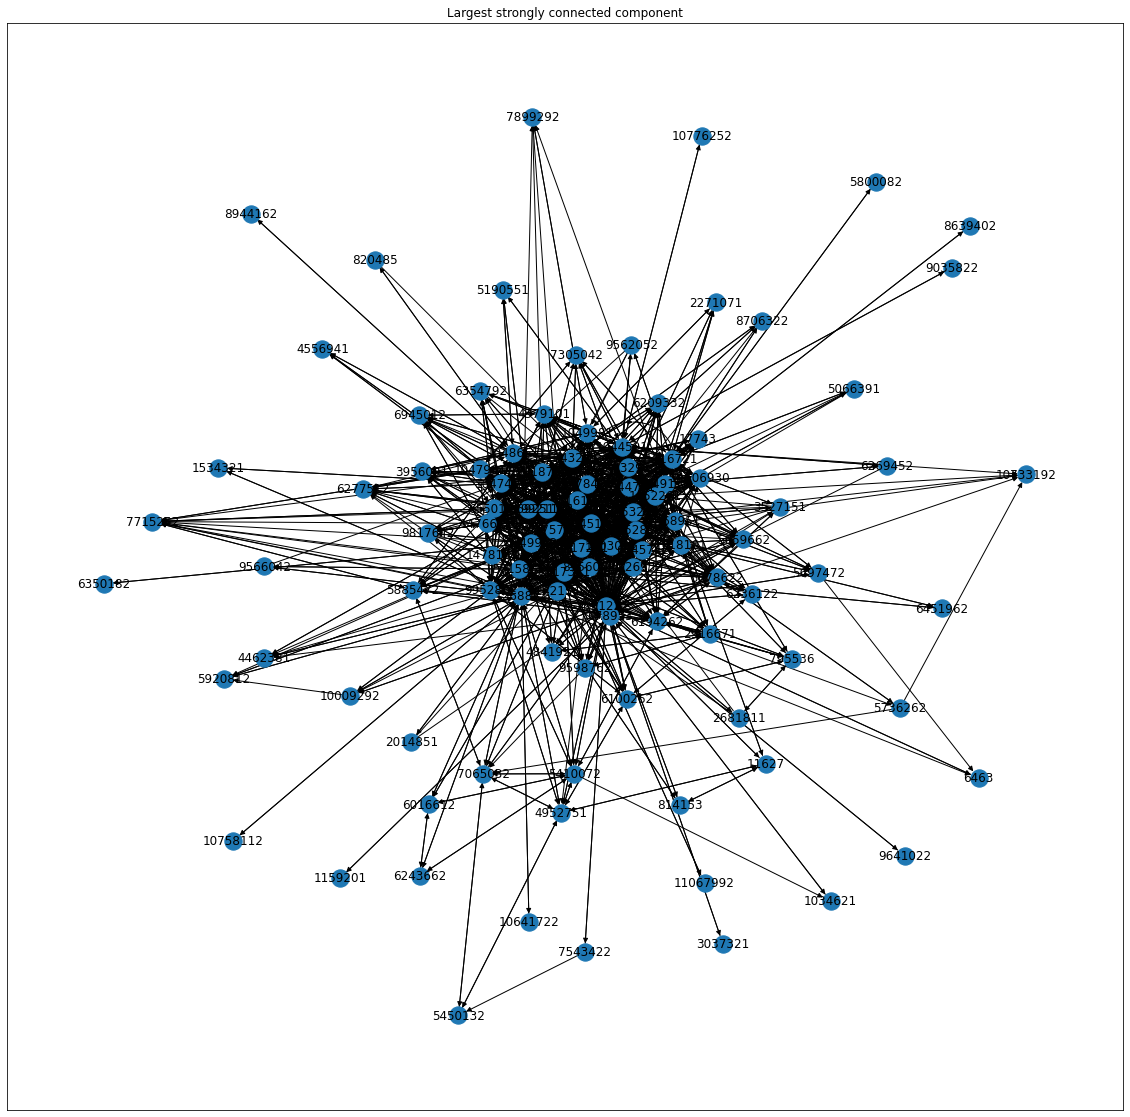

In [ ]:
draw_plot_networkx(largestStronglyConnectedComponent, "Largest strongly connected component")

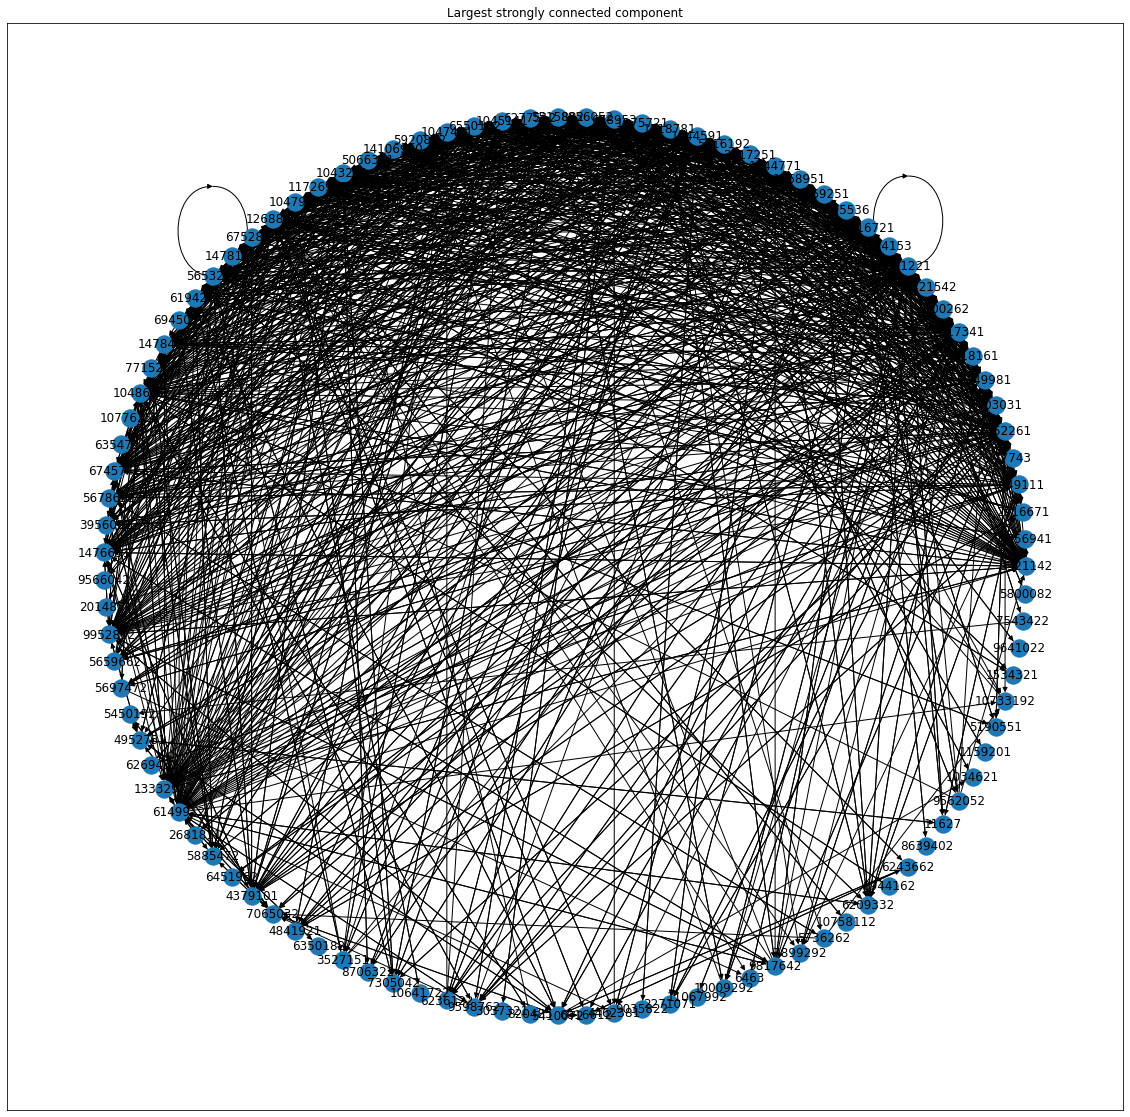

In [ ]:
draw_circular_networkx(largestStronglyConnectedComponent, "Largest strongly connected component")

#Question (d)

We will close the betweenness closeness algorithm to help us to take an even closer look at the network's nodes.

After finding the node with the highest value and the node with the lowest value for the betweenness closeness, we can find the neighbours for those the following similarities.

The function getNeighbours helps to get the neighbour nodes from a specific given node. The function getIntersectionNeighbours will help to find the common neighbour node between two given nodes. The function plotDistributions helps to the distributions for the following similarities.

Note that we will work with largest strongly connected component from the Twitter ego found in Question (c). I was not able to work with the whole Twitter ego since my network has outliers. By this i mean, the network contains node which are not linked to any other node in the network. This can lead to a problem: eg. the cosine similarity is a division by the number of neighbours of 2 nodes. If at least one of the two nodes is a outlier, it has 0 as the number of neighbours, so it will raise some zero division error.

In [ ]:
valueOfBetweenness = nx.betweenness_centrality(largestStronglyConnectedComponent, normalized = True)
print(valueOfBetweenness)

{9921142: 0.01882653793962456, 4556941: 0.0, 2916671: 0.0009848099229973711, 1049111: 0.013799946212878797, 17743: 0.0003400914370506071, 1452261: 0.03371916186007844, 1403031: 0.005563740092261054, 1049981: 0.016889230689943562, 1118161: 0.010158876161853661, 1117341: 0.08150563743419525, 6100262: 0.002728022422714026, 51421542: 0.005562892628023315, 991221: 0.15748709453134932, 814153: 0.00021319156802558086, 1116721: 0.09092247119092102, 795536: 0.0013058688028196083, 1269251: 0.02602998929926305, 1468951: 0.0018580053242079327, 1044771: 0.014136590087045224, 2217251: 0.002550659253026741, 5516192: 0.0032913663028522936, 1044591: 0.08220646469087237, 1118781: 0.025089305980806907, 1975721: 0.0012374606961857324, 678953: 0.09994494974483692, 8956052: 0.006891697506681, 5515802: 0.04137418083327971, 6277512: 0.0006407619420030708, 1045141: 0.02230439628885438, 6550132: 0.015946622947716337, 1047451: 0.02923500349578212, 5920812: 0.00012991126622613608, 14106930: 0.0001601129897945313,

In [ ]:
maxNode = 0
maxValue = 0
for node in valueOfBetweenness:
  if maxValue < valueOfBetweenness[node]:
    maxValue = valueOfBetweenness[node]
    maxNode = node

minNode = 0
minValue = maxValue
for node in valueOfBetweenness:
  if minValue > valueOfBetweenness[node]:
    minValue = valueOfBetweenness[node]
    minNode = node

print("The node Id with the highest value of the betweenness closeness is", maxNode, "and the node Id with the lowest value of the betweenness closeness is", minNode)

The node Id with the highest value of the betweenness closeness is 991221 and the node Id with the lowest value of the betweenness closeness is 4556941


In [ ]:
def getNeighbours(G, node):
  neighbours = []
  for n in list(G.nodes):
    if G.has_edge(node, n) == True:
      neighbours.append(n)
  return neighbours

In [ ]:
def getIntersectionNeighbours(G, node1, node2):
  listOfNeighboursForNode1 = getNeighbours(G, node1)
  listOfNeighboursForNode2 = getNeighbours(G, node2)
  listOfIntersection = []
  for i in listOfNeighboursForNode1:
    if i in listOfNeighboursForNode2:
        listOfIntersection.append(i)
  return listOfIntersection


In [ ]:
def plotDistributions(valuesForMax, valuesForMin, titleForMax, titleForMin, nameSet):
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))
  ax1.hist(valuesForMax)
  ax1.set_title(titleForMax)
  ax1.set_xlabel(nameSet)
  ax1.set_ylabel('Number of nodes')
  ax2.set_title(titleForMin)
  ax2.hist(valuesForMin)
  ax2.set_xlabel(nameSet)
  ax2.set_ylabel('Number of nodes')
  plt.tight_layout()
  plt.show()

Jaccard similarity

In [ ]:
jaccardSimilarityMaxNodes = {}

for node in list(largestStronglyConnectedComponent.nodes):
  divisor = len(getNeighbours(largestStronglyConnectedComponent, maxNode)) + len(getNeighbours(largestStronglyConnectedComponent, node)) - len(getIntersectionNeighbours(largestStronglyConnectedComponent, maxNode, node))
  jaccardSimilarityMaxNodes[node] = len(getIntersectionNeighbours(largestStronglyConnectedComponent, maxNode, node))/divisor
print("This is the Jaccard Similarities between the node with maximum value of betweenness closeness and the rest of the nodes in the graph", jaccardSimilarityMaxNodes)


This is the Jaccard Similarities between the node with maximum value of betweenness closeness and the rest of the nodes in the graph {9921142: 0.5245901639344263, 4556941: 0.05084745762711865, 2916671: 0.15, 1049111: 0.41935483870967744, 17743: 0.15254237288135594, 1452261: 0.5, 1403031: 0.41935483870967744, 1049981: 0.38095238095238093, 1118161: 0.43548387096774194, 1117341: 0.5507246376811594, 6100262: 0.15, 51421542: 0.3559322033898305, 991221: 1.0, 814153: 0.05084745762711865, 1116721: 0.5147058823529411, 795536: 0.11864406779661017, 1269251: 0.4444444444444444, 1468951: 0.3220338983050847, 1044771: 0.3870967741935484, 2217251: 0.3559322033898305, 5516192: 0.4426229508196721, 1044591: 0.4142857142857143, 1118781: 0.49206349206349204, 1975721: 0.3333333333333333, 678953: 0.5, 8956052: 0.42857142857142855, 5515802: 0.417910447761194, 6277512: 0.1, 1045141: 0.4098360655737705, 6550132: 0.42857142857142855, 1047451: 0.390625, 5920812: 0.03389830508474576, 14106930: 0.2542372881355932, 

In [ ]:
jaccardSimilarityMinNodes = {}

for node in list(largestStronglyConnectedComponent.nodes):
  divisor = len(getNeighbours(largestStronglyConnectedComponent, minNode)) + len(getNeighbours(largestStronglyConnectedComponent, node)) - len(getIntersectionNeighbours(largestStronglyConnectedComponent, minNode, node))
  jaccardSimilarityMinNodes[node] = len(getIntersectionNeighbours(largestStronglyConnectedComponent, minNode, node))/divisor
print("This is the Jaccard Similarities between the node with minimum value of betweenness closeness and the rest of the nodes in the graph", jaccardSimilarityMinNodes)


This is the Jaccard Similarities between the node with minimum value of betweenness closeness and the rest of the nodes in the graph {9921142: 0.05714285714285714, 4556941: 1.0, 2916671: 0.0, 1049111: 0.10344827586206896, 17743: 0.09090909090909091, 1452261: 0.075, 1403031: 0.10344827586206896, 1049981: 0.10714285714285714, 1118161: 0.1, 1117341: 0.0625, 6100262: 0.08333333333333333, 51421542: 0.14285714285714285, 991221: 0.05084745762711865, 814153: 0.0, 1116721: 0.06818181818181818, 795536: 0.0, 1269251: 0.09375, 1468951: 0.15789473684210525, 1044771: 0.07142857142857142, 2217251: 0.14285714285714285, 5516192: 0.10344827586206896, 1044591: 0.075, 1118781: 0.08571428571428572, 1975721: 0.14285714285714285, 678953: 0.0425531914893617, 8956052: 0.030303030303030304, 5515802: 0.08333333333333333, 6277512: 0.25, 1045141: 0.1111111111111111, 6550132: 0.0967741935483871, 1047451: 0.06451612903225806, 5920812: 0.0, 14106930: 0.2, 5066391: 0.0, 1043241: 0.11538461538461539, 11726932: 0.037037

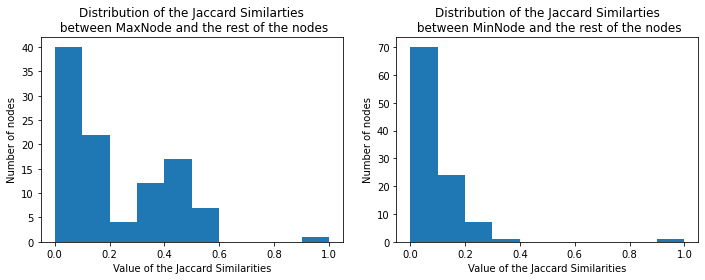

In [ ]:
plotDistributions(jaccardSimilarityMaxNodes.values(), jaccardSimilarityMinNodes.values(), 
                  "Distribution of the Jaccard Similarties\n between MaxNode and the rest of the nodes", "Distribution of the Jaccard Similarties\n between MinNode and the rest of the nodes", "Value of the Jaccard Similarities")

Cosine similarity

In [ ]:
cosineSimilarityMaxNodes = {}

for node in list(largestStronglyConnectedComponent.nodes):
  divisor = (len(getNeighbours(largestStronglyConnectedComponent, maxNode)) * len(getNeighbours(largestStronglyConnectedComponent, node)))**(1/2)
  cosineSimilarityMaxNodes[node] = len(getIntersectionNeighbours(largestStronglyConnectedComponent, maxNode, node))/divisor
print("This is the Cosine Similarities between the node with maximum value of betweenness closeness and the rest of the nodes in the graph", cosineSimilarityMaxNodes)


This is the Cosine Similarities between the node with maximum value of betweenness closeness and the rest of the nodes in the graph {9921142: 0.7144708491025704, 4556941: 0.22549380840084865, 2916671: 0.37052413631667824, 1049111: 0.6285623201386409, 17743: 0.3905667329424716, 1452261: 0.6792942499139101, 1403031: 0.6285623201386409, 1049981: 0.5904813975661475, 1118161: 0.6417666295310632, 1117341: 0.7140637266026875, 6100262: 0.37052413631667824, 51421542: 0.5966005392134929, 991221: 1.0, 814153: 0.22549380840084865, 1116721: 0.6869350879815022, 795536: 0.34444748191358604, 1269251: 0.6444022325288263, 1468951: 0.5674803065350239, 1044771: 0.6013168224022631, 2217251: 0.5966005392134929, 5516192: 0.6527377939901271, 1044591: 0.5969555529546483, 1118781: 0.6821842146102753, 1975721: 0.5681909897271361, 678953: 0.6718357696640954, 8956052: 0.6313307042856902, 5515802: 0.6075482512438447, 6277512: 0.29524069878307374, 1045141: 0.6263716900023574, 6550132: 0.6313307042856902, 1047451: 0.

In [ ]:
cosineSimilarityMinNodes = {}

for node in list(largestStronglyConnectedComponent.nodes):
  divisor = (len(getNeighbours(largestStronglyConnectedComponent, minNode)) * len(getNeighbours(largestStronglyConnectedComponent, node)))**(1/2)
  cosineSimilarityMinNodes[node] = len(getIntersectionNeighbours(largestStronglyConnectedComponent, minNode, node))/divisor
print("This is the Cosine Similarities between the node with minimum value of betweenness closeness and the rest of the nodes in the graph", cosineSimilarityMinNodes)


This is the Cosine Similarities between the node with minimum value of betweenness closeness and the rest of the nodes in the graph {9921142: 0.19802950859533489, 4556941: 1.0, 2916671: 0.0, 1049111: 0.3216337604513384, 17743: 0.19245008972987526, 1452261: 0.27386127875258304, 1403031: 0.3216337604513384, 1049981: 0.3273268353539886, 1118161: 0.31622776601683794, 1117341: 0.25, 6100262: 0.18257418583505536, 51421542: 0.3779644730092272, 991221: 0.22549380840084865, 814153: 0.0, 1116721: 0.26111648393354675, 795536: 0.0, 1269251: 0.3061862178478973, 1468951: 0.39735970711951313, 1044771: 0.2222222222222222, 2217251: 0.3779644730092272, 5516192: 0.3216337604513384, 1044591: 0.27386127875258304, 1118781: 0.29277002188455997, 1975721: 0.3779644730092272, 678953: 0.17025130615174972, 8956052: 0.10369516947304253, 5515802: 0.28867513459481287, 6277512: 0.4364357804719848, 1045141: 0.3333333333333333, 6550132: 0.3110855084191276, 1047451: 0.21081851067789195, 5920812: 0.0, 14106930: 0.4472135

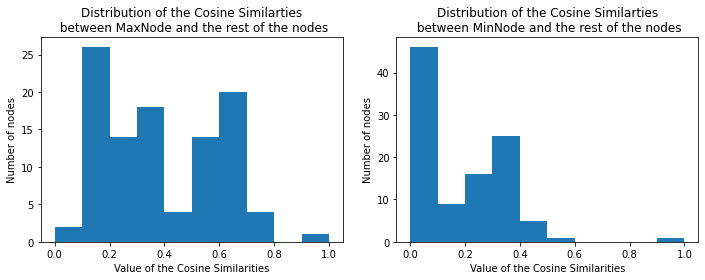

In [ ]:
plotDistributions(cosineSimilarityMaxNodes.values(), cosineSimilarityMinNodes.values(), 
                  "Distribution of the Cosine Similarties\n between MaxNode and the rest of the nodes", "Distribution of the Cosine Similarties\n between MinNode and the rest of the nodes", "Value of the Cosine Similarities")

Normalised Euclidean distance

In [ ]:
normalisedEuclideanDistanceMaxNodes = {}

for node in list(largestStronglyConnectedComponent.nodes):
  divisor = len(getNeighbours(largestStronglyConnectedComponent, maxNode)) + len(getNeighbours(largestStronglyConnectedComponent, node))
  normalisedEuclideanDistanceMaxNodes[node] = 1- 2*len(getIntersectionNeighbours(largestStronglyConnectedComponent, maxNode, node))/divisor
print("This is the normalised Euclidean distance between the node with maximum value of betweenness closeness and the rest of the nodes in the graph", normalisedEuclideanDistanceMaxNodes)

This is the normalised Euclidean distance between the node with maximum value of betweenness closeness and the rest of the nodes in the graph {9921142: 0.31182795698924726, 4556941: 0.9032258064516129, 2916671: 0.7391304347826086, 1049111: 0.40909090909090906, 17743: 0.7352941176470589, 1452261: 0.33333333333333337, 1403031: 0.40909090909090906, 1049981: 0.4482758620689655, 1118161: 0.3932584269662921, 1117341: 0.28971962616822433, 6100262: 0.7391304347826086, 51421542: 0.475, 991221: 0.0, 814153: 0.9032258064516129, 1116721: 0.3203883495145631, 795536: 0.7878787878787878, 1269251: 0.3846153846153846, 1468951: 0.5128205128205128, 1044771: 0.4418604651162791, 2217251: 0.475, 5516192: 0.38636363636363635, 1044591: 0.41414141414141414, 1118781: 0.34042553191489366, 1975721: 0.5, 678953: 0.33333333333333337, 8956052: 0.4, 5515802: 0.41052631578947374, 6277512: 0.8181818181818181, 1045141: 0.41860465116279066, 6550132: 0.4, 1047451: 0.4382022471910112, 5920812: 0.9344262295081968, 14106930:

In [ ]:
normalisedEuclideanDistanceMinNodes = {}

for node in list(largestStronglyConnectedComponent.nodes):
  divisor = len(getNeighbours(largestStronglyConnectedComponent, minNode)) + len(getNeighbours(largestStronglyConnectedComponent, node))
  normalisedEuclideanDistanceMinNodes[node] = 1- 2*len(getIntersectionNeighbours(largestStronglyConnectedComponent, minNode, node))/divisor
print("This is the normalised Euclidean distance between the node with mainimum value of betweenness closeness and the rest of the nodes in the graph", normalisedEuclideanDistanceMinNodes)

This is the normalised Euclidean distance between the node with mainimum value of betweenness closeness and the rest of the nodes in the graph {9921142: 0.8918918918918919, 4556941: 0.0, 2916671: 1.0, 1049111: 0.8125, 17743: 0.8333333333333334, 1452261: 0.8604651162790697, 1403031: 0.8125, 1049981: 0.8064516129032258, 1118161: 0.8181818181818181, 1117341: 0.8823529411764706, 6100262: 0.8461538461538461, 51421542: 0.75, 991221: 0.9032258064516129, 814153: 1.0, 1116721: 0.8723404255319149, 795536: 1.0, 1269251: 0.8285714285714285, 1468951: 0.7272727272727273, 1044771: 0.8666666666666667, 2217251: 0.75, 5516192: 0.8125, 1044591: 0.8604651162790697, 1118781: 0.8421052631578947, 1975721: 0.75, 678953: 0.9183673469387755, 8956052: 0.9411764705882353, 5515802: 0.8461538461538461, 6277512: 0.6, 1045141: 0.8, 6550132: 0.8235294117647058, 1047451: 0.8787878787878788, 5920812: 1.0, 14106930: 0.6666666666666667, 5066391: 1.0, 1043241: 0.7931034482758621, 11726932: 0.9285714285714286, 1047961: 0.75

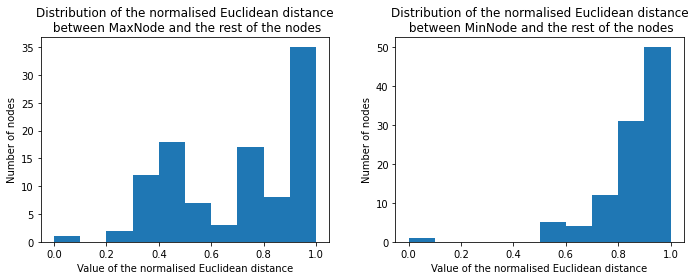

In [ ]:
plotDistributions(normalisedEuclideanDistanceMaxNodes.values(), normalisedEuclideanDistanceMinNodes.values(), 
                  "Distribution of the normalised Euclidean distance\n between MaxNode and the rest of the nodes", "Distribution of the normalised Euclidean distance\n between MinNode and the rest of the nodes", "Value of the normalised Euclidean distance")